# JyotishAI – Clean, Filter & Visualize (100+ Rows)

1. Load 100+ row CSV  
2. Show nulls  
3. Clean & filter  
4. Save clean CSV  
5. 5 Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')
os.makedirs('assets/plots', exist_ok=True)
os.makedirs('data/clean', exist_ok=True)

In [2]:
df = pd.read_csv('data/raw/kundali_examples.csv')
print(f'Loaded {len(df)} rows')
df.head()

Loaded 102 rows


,birth_date,birth_time,place,lagna,sun,moon,mars,mercury,jupiter,venus,saturn,rahu,ketu,question,prediction
1998-06-12,07:15,Pokhara,Nepal,Capricorn,Aquarius,Cancer,Libra,Virgo,Sagittarius,Scorpio,Capricorn,Gemini,Sagittarius,Career?,Saturn in 10th: Govt job after 2026. Wear blue...
2000-03-22,14:30,Kathmandu,Nepal,Leo,Gemini,Leo,Capricorn,Aquarius,Pisces,Aries,Libra,Scorpio,Taurus,Marriage?,Jupiter in 7th: Love marriage 2025. Wear yello...
1995-11-05,09:45,Biratnagar,Nepal,Scorpio,Libra,Virgo,Gemini,Cancer,Leo,Virgo,Scorpio,Aries,Libra,Health?,Moon in 6th: Watch stomach. Chant Mahamrityunj...
1997-02-14,06:20,Kathmandu,Nepal,Aquarius,Capricorn,Libra,Scorpio,Sagittarius,Capricorn,Aquarius,Pisces,Virgo,Pisces,Love Life?,Venus in Capricorn: True love after delay. Off...
1999-08-30,15:45,Pokhara,Nepal,Leo,Cancer,Scorpio,Virgo,Leo,Virgo,Libra,Capricorn,Gemini,Sagittarius,Job?,Mars in 10th: Engineering job 2025. Chant Hanu...


NULLS:
birth_date    0
birth_time    0
place         0
lagna         0
sun           0
moon          0
mars          0
mercury       0
jupiter       0
venus         0
saturn        0
rahu          0
ketu          0
question      0
prediction    0
dtype: int64


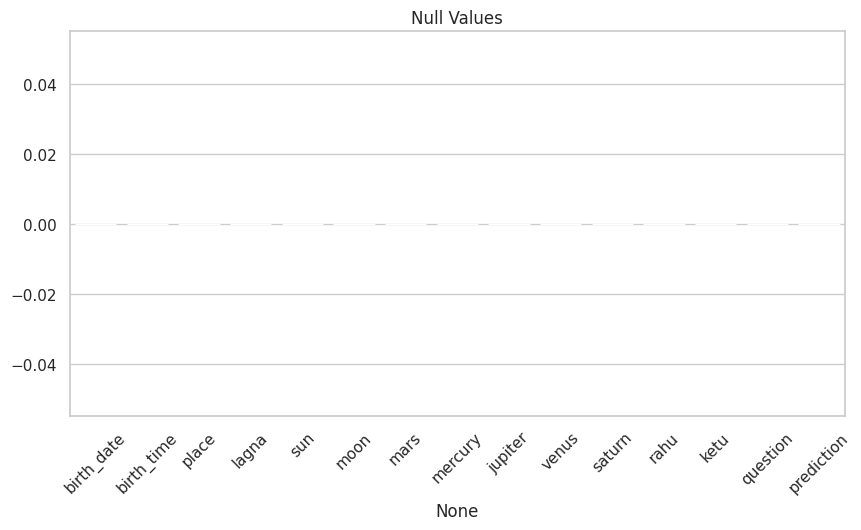

In [3]:
print('NULLS:')
print(df.isnull().sum())

plt.figure(figsize=(10,5))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=45)
plt.title('Null Values')
plt.show()

In [4]:
df = df.drop_duplicates()
valid = ['Career?', 'Marriage?', 'Health?', 'Studies?', 'Wealth?', 'Love Life?', 'Job?', 'Business?', 'Future?', 'Family?']
df = df[df['question'].isin(valid)]
df = df.fillna('Unknown')
df.to_csv('data/clean/clean_kundali.csv', index=False)
print(f'Cleaned: {len(df)} rows saved')

Cleaned: 102 rows saved


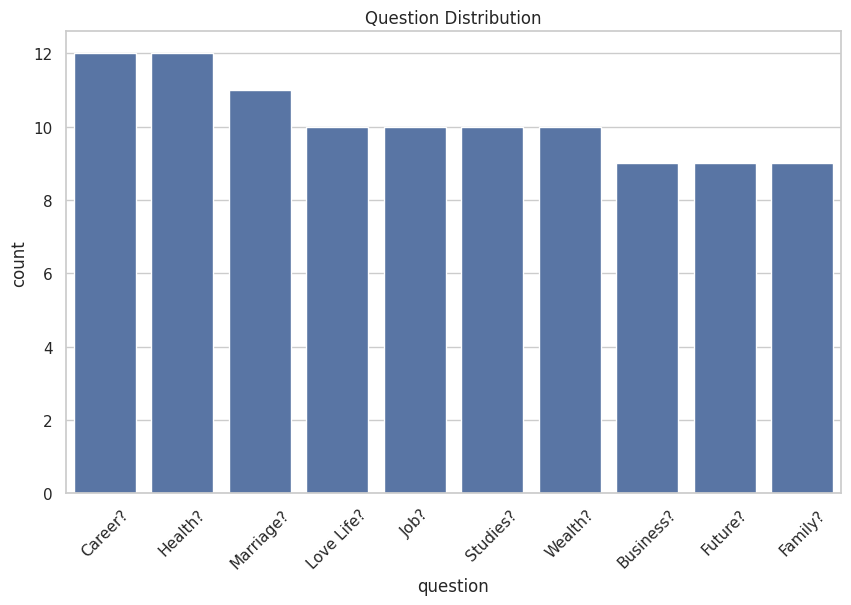

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='question', order=df['question'].value_counts().index)
plt.title('Question Distribution')
plt.xticks(rotation=45)
plt.savefig('assets/plots/q1.png')
plt.show()

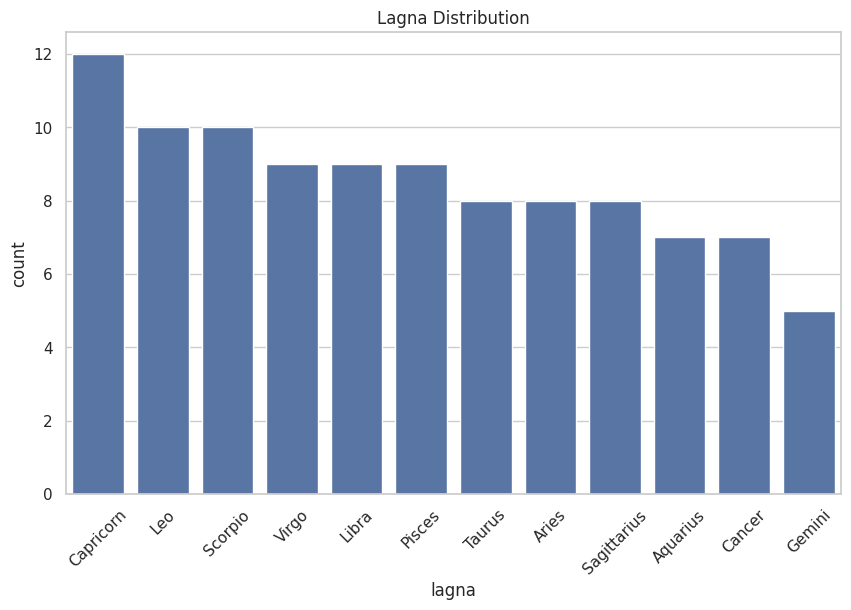

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='lagna', order=df['lagna'].value_counts().index)
plt.title('Lagna Distribution')
plt.xticks(rotation=45)
plt.savefig('assets/plots/q2.png')
plt.show()

/tmp/ipykernel_35529/817354887.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['year'] = pd.to_datetime(df['birth_date']).dt.year


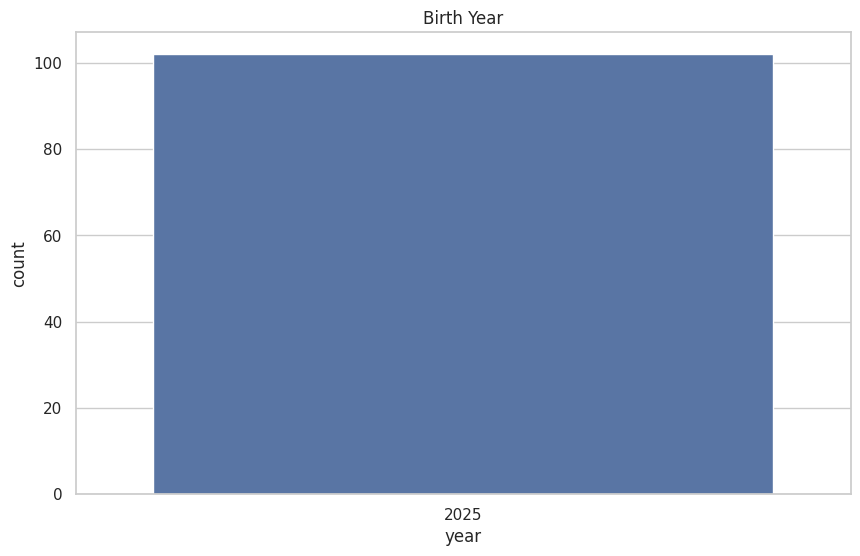

In [7]:
df['year'] = pd.to_datetime(df['birth_date']).dt.year
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year')
plt.title('Birth Year')
plt.savefig('assets/plots/q3.png')
plt.show()